In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('83b07f0f-d32b-46eb-be42-1b81ab529b66.csv', sep=";")
print(data.head())

   day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0    2          0         ROSES        14421            30      14420.0   
1    2          0  STRAWBERRIES         4036           181          NaN   
2    2          0     AMETHYSTS         9996             2       9995.0   
3    2          0       ORCHIDS         1053             7       1052.0   
4    2          0     STARFRUIT         5023             1       5022.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          42.0          NaN           NaN        14422            72   
1           NaN          NaN           NaN         4037           181   
2          25.0          NaN           NaN        10004             2   
3           2.0       1046.0          46.0         1059             7   
4          27.0          NaN           NaN         5029            27   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          Na

In [3]:
strawberry_all_days = data[data['product'] == "STRAWBERRIES"]
chocolate_all_days = data[data['product'] == "CHOCOLATE"]
roses_all_days = data[data['product'] == "ROSES"]
print(strawberry_all_days.shape)
print(chocolate_all_days.shape)
print(roses_all_days.shape)

(1000, 17)
(1000, 17)
(1000, 17)


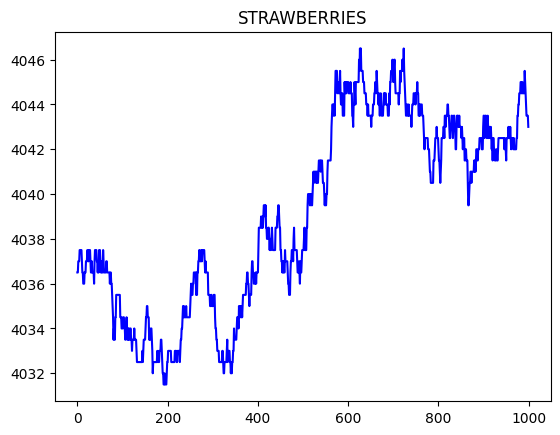

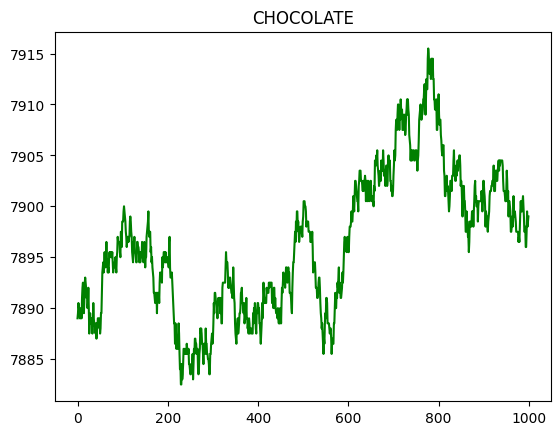

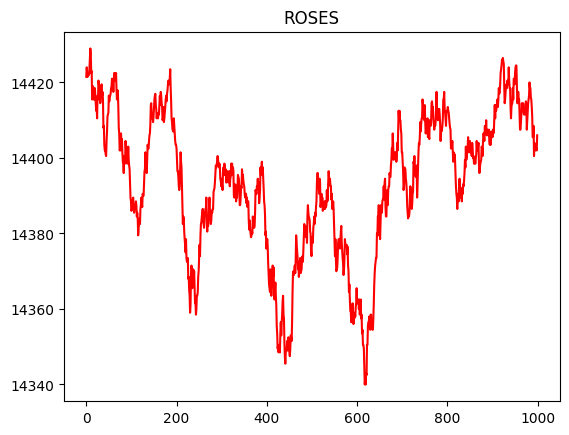

In [4]:
strawberry_all_days.reset_index(inplace=True)
chocolate_all_days.reset_index(inplace=True)
roses_all_days.reset_index(inplace=True)

plt.plot(strawberry_all_days['mid_price'], color="blue")
plt.title("STRAWBERRIES")
plt.show()
plt.plot(chocolate_all_days['mid_price'], color="green")
plt.title("CHOCOLATE")
plt.show()
plt.plot(roses_all_days['mid_price'], color="red")
plt.title("ROSES")
plt.show()

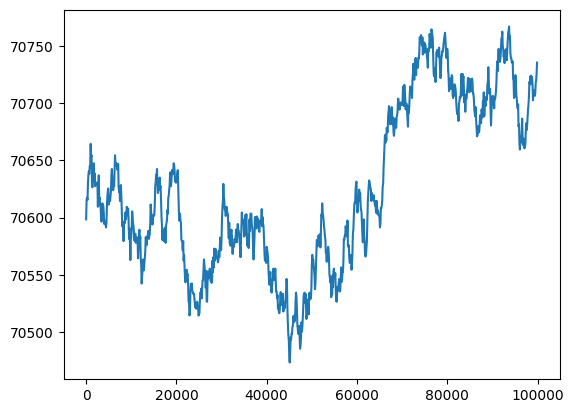

   index  day  timestamp      product  bid_price_1  bid_volume_1  bid_price_2  \
0      6    2          0  GIFT_BASKET        70593             2      70592.0   
1      8    2        100  GIFT_BASKET        70610             2      70609.0   
2     18    2        200  GIFT_BASKET        70611            14      70609.0   
3     25    2        300  GIFT_BASKET        70610             1      70609.0   
4     32    2        400  GIFT_BASKET        70623            19      70622.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          14.0      70591.0          30.0        70604             2   
1          10.0      70608.0          20.0        70621             2   
2          25.0          NaN           NaN        70624            14   
3          19.0      70608.0          22.0        70621             1   
4          21.0          NaN           NaN        70636            19   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0   

In [5]:
gift_basket_alldays = data[data['product'] == "GIFT_BASKET"].reset_index()
plt.plot(gift_basket_alldays['timestamp'],gift_basket_alldays['mid_price'])
plt.show()
print(gift_basket_alldays.head())
print(gift_basket_alldays.shape)

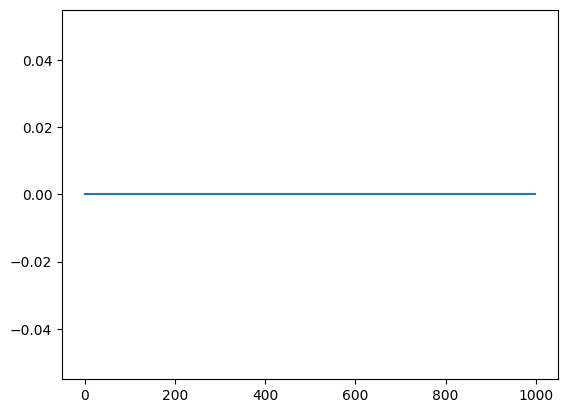

In [16]:
# check the pnl
profit_analysis = gift_basket_alldays['profit_and_loss'] + strawberry_all_days['profit_and_loss'] + chocolate_all_days['profit_and_loss'] + roses_all_days['profit_and_loss']
plt.plot(profit_analysis)

In [6]:
# check if the basket price is literally just equal to 4 * Chocolate + 6 * Strawberries + 1 * Rose at that time point. 
mid_price_data = pd.DataFrame({
    "STRAWBERRIES": strawberry_all_days['mid_price'],
    "CHOCOLATE": chocolate_all_days['mid_price'],
    "ROSES": roses_all_days['mid_price'],
    "GIFT_BASKET": gift_basket_alldays['mid_price']
}, index=strawberry_all_days.index)
print(mid_price_data.head())
print(mid_price_data.shape)

   STRAWBERRIES  CHOCOLATE    ROSES  GIFT_BASKET
0        4036.5     7889.0  14421.5      70598.5
1        4036.5     7889.5  14424.0      70615.5
2        4037.0     7890.5  14422.5      70617.5
3        4037.0     7890.0  14421.5      70615.5
4        4037.0     7890.0  14422.0      70629.5
(1000, 4)


In [7]:
mid_price_data['SUM_OF_PARTS'] = 4 * mid_price_data['CHOCOLATE'] + 6 * mid_price_data['STRAWBERRIES'] + mid_price_data['ROSES']
print(mid_price_data.head())

   STRAWBERRIES  CHOCOLATE    ROSES  GIFT_BASKET  SUM_OF_PARTS
0        4036.5     7889.0  14421.5      70598.5       70196.5
1        4036.5     7889.5  14424.0      70615.5       70201.0
2        4037.0     7890.5  14422.5      70617.5       70206.5
3        4037.0     7890.0  14421.5      70615.5       70203.5
4        4037.0     7890.0  14422.0      70629.5       70204.0


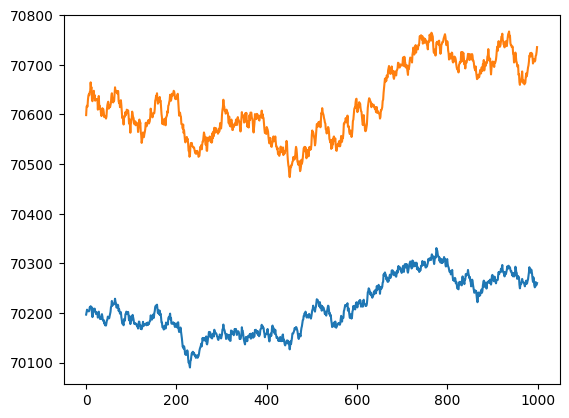

In [8]:
plt.plot(mid_price_data['SUM_OF_PARTS'])
plt.plot(mid_price_data['GIFT_BASKET'])
plt.show()

In [9]:
window = 30

gift_basket_diff = mid_price_data['SUM_OF_PARTS'] - mid_price_data['GIFT_BASKET']

avg_rolling_spread = gift_basket_diff.rolling(window)\
    .mean()

#mov_spread5 = gift_basket_diff.rolling(5).mean()
mov_spread5 = gift_basket_diff

rolling_std_spread = gift_basket_diff.rolling(window)\
    .std()

<Axes: >

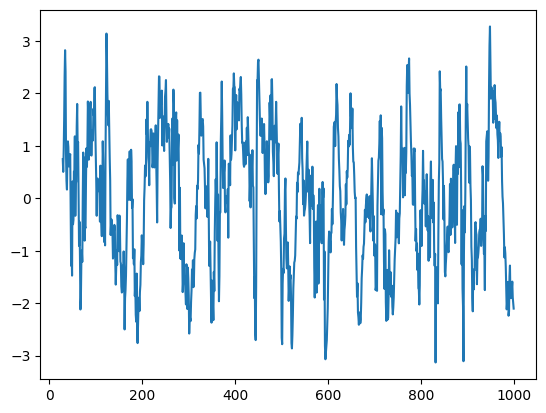

In [10]:
zscore_spread = (mov_spread5 - avg_rolling_spread)/rolling_std_spread

zscore_spread.plot()

In [11]:
buy = (zscore_spread < -2) | (zscore_spread == 0)
sell = (zscore_spread > 2) | (zscore_spread == 0)

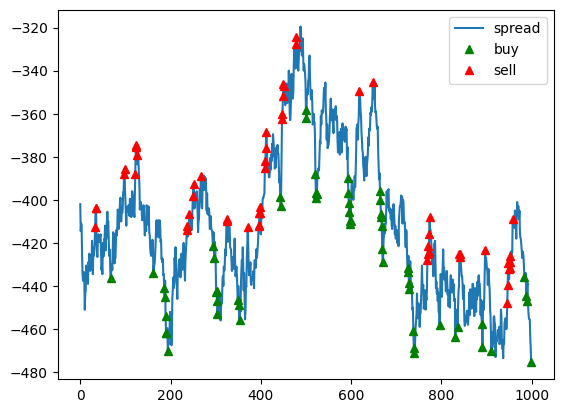

In [12]:
gift_basket_diff.plot(label = 'spread')
gift_basket_diff[buy].plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)
gift_basket_diff[sell].plot(
    marker= '^', 
    color = 'red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()

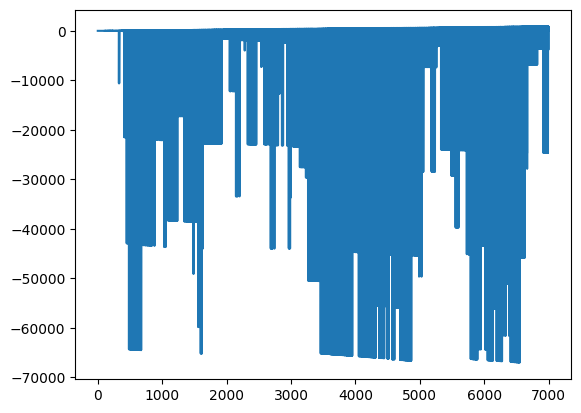

In [13]:
plt.plot(data['profit_and_loss'])
plt.show()